<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





### Setting up the generator

In [1]:
# Import the Data generator class from the ts_data_generator module 
from ts_data_generator import DataGen
from ts_data_generator.schema.models import Granularity

Instantiate the generator, then</br>set start and end datetime along with the granularity.

In [ ]:

d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-12"
d.granularity = Granularity.FIVE_MIN

### Adding dimension
Adding a dimension needs two parameter: a name(str) and a function.</br>
The function parameter can take either integer, float, string or generator object as input.

There are some useful generator objects like `random_choice` and `random_int` in the `ts_data_generator.utils.functions` module

In [3]:
from ts_data_generator.utils.functions import random_choice, random_int
import matplotlib.pyplot as plt

d.add_dimension("product", random_choice(["A", "B", "C", "D"]))
d.add_dimension("product_id", random_int(1,10000))

In [4]:
d.data

,product,product_id
2019-01-01 00:00:00,C,1526
2019-01-01 00:05:00,A,9488
2019-01-01 00:10:00,B,9764
2019-01-01 00:15:00,A,2923
2019-01-01 00:20:00,B,698
...,...,...
2019-01-11 23:40:00,B,6317
2019-01-11 23:45:00,C,99
2019-01-11 23:50:00,B,5883
2019-01-11 23:55:00,D,6180


### Adding Metrics

Adding a metric needs two parameters: a name(str) and Trends.</br>
Trends are components that can be layered to create complex metrics. They create trends to simulate any metrics.</br>
You can club multiple trends to achieve your desired metric. Out of the box, there are four trends: Sine, Linear, Weekend, Stock


In [ ]:
from ts_data_generator.utils.trends import SinusoidalTrend, LinearTrend, WeekendTrend, StockTrend


d.add_metric(
    name="sinusoidal", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=6, freq=3, phase=0, noise_level=1.5)
    ]
    )


d.add_metric(
    name="sinusoidal_linear", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=3, freq=5, phase=0, noise_level=1.5),
        LinearTrend(name="linear", limit=30, offset=10, noise_level=1)
    ])


d.add_metric(
    name="weekend_trend", 
    trends=[
        WeekendTrend(name="weekend", weekend_effect=10, direction="up", noise_level=0.5, limit=10)
    ])


d.add_metric(
    name="stock_like_trend", 
    trends=[
        StockTrend(name='stock', amplitude=10, direction='up', noise_level=0.5),
        LinearTrend(name='Linear', offset=0, noise_level=1, limit=10)
    ])

### Plot the data
Since the dataset in pandas, only numeric data is plotted.</br>
You exclude or include columns with the arguments `exclude` and `include`

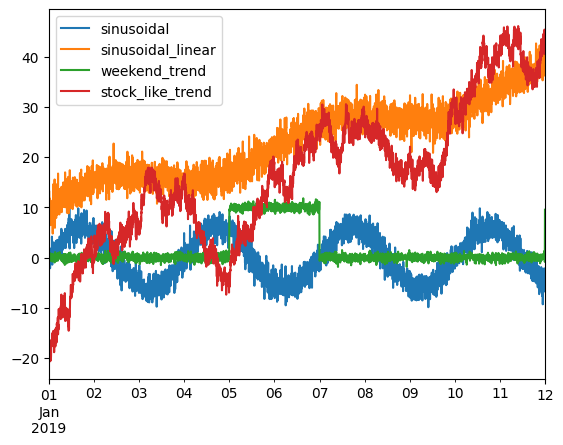

In [6]:
d.plot(exclude=['product_id'])

In [7]:
d.data

,product,product_id,sinusoidal,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,C,1526,-1.097469,3.823048,0.060965,-20.315514
2019-01-01 00:05:00,A,9488,-1.012085,13.301663,-0.556586,-19.761978
2019-01-01 00:10:00,B,9764,-0.350069,10.124149,0.745594,-20.755697
2019-01-01 00:15:00,A,2923,1.903948,9.896421,0.067029,-20.076876
2019-01-01 00:20:00,B,698,-0.379661,7.626646,-0.231247,-19.727536
...,...,...,...,...,...,...
2019-01-11 23:40:00,B,6317,-5.412711,36.212903,1.341324,43.652126
2019-01-11 23:45:00,C,99,-3.304607,36.284574,0.130238,45.351670
2019-01-11 23:50:00,B,5883,-5.344049,38.597778,0.287216,41.871107
2019-01-11 23:55:00,D,6180,-5.536813,37.842967,-0.830313,40.720220


### Removing a metric or dimension
You can remove a dimension or metric from the generator using the name

In [8]:
d.remove_dimension('product_id')
d.remove_metric('sinusoidal')
d.data

,product,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,C,3.823048,0.060965,-20.315514
2019-01-01 00:05:00,A,13.301663,-0.556586,-19.761978
2019-01-01 00:10:00,B,10.124149,0.745594,-20.755697
2019-01-01 00:15:00,A,9.896421,0.067029,-20.076876
2019-01-01 00:20:00,B,7.626646,-0.231247,-19.727536
...,...,...,...,...
2019-01-11 23:40:00,B,36.212903,1.341324,43.652126
2019-01-11 23:45:00,C,36.284574,0.130238,45.351670
2019-01-11 23:50:00,B,38.597778,0.287216,41.871107
2019-01-11 23:55:00,D,37.842967,-0.830313,40.720220


### Extending time range
Changing the start or end datetime if automatically generate the data for all columns

In [9]:
d.end_datetime = '2019-01-12 01:05:00'
d.data

,product,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,D,7.775287,0.755077,-20.091840
2019-01-01 00:05:00,A,10.335366,0.118038,-18.993286
2019-01-01 00:10:00,B,9.210477,1.000406,-19.211395
2019-01-01 00:15:00,D,12.158178,0.259801,-21.737650
2019-01-01 00:20:00,C,10.860559,-0.146644,-18.650253
...,...,...,...,...
2019-01-12 00:45:00,A,41.490973,9.619034,46.232399
2019-01-12 00:50:00,B,37.957410,9.581665,45.725169
2019-01-12 00:55:00,B,38.666175,9.654474,43.329597
2019-01-12 01:00:00,B,39.193487,10.504088,42.956982
